# Lineer vs Poly

Import & Data 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("Advertising.csv")

In [66]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA

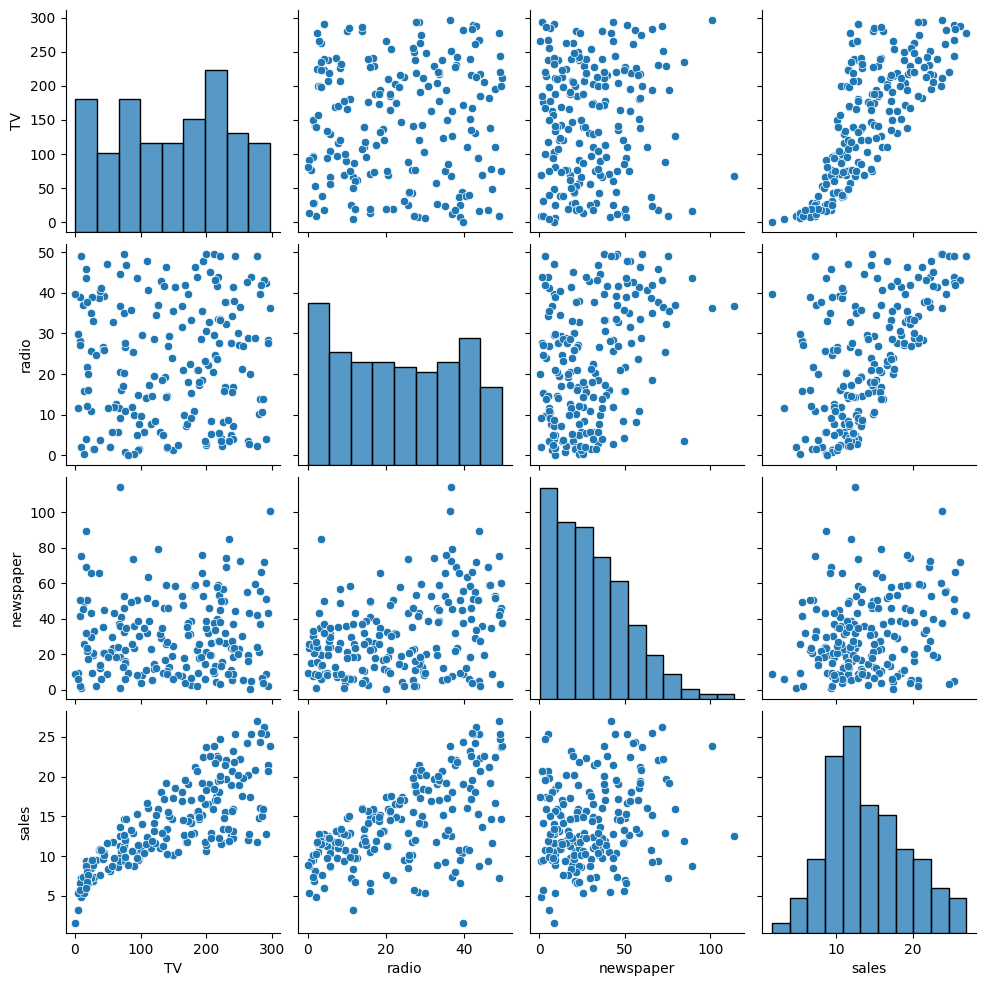

In [67]:
sns.pairplot(data=df)

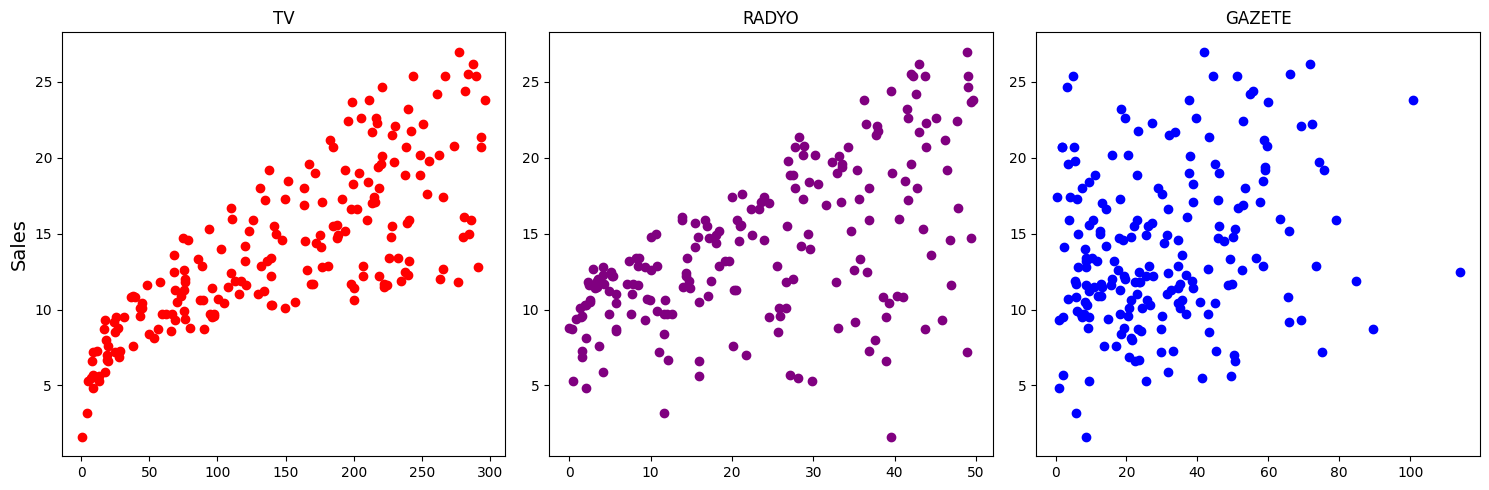

In [68]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].set_title("GAZETE")

plt.tight_layout()

## np.polyfit()

In [69]:
df.shape

(200, 4)

In [70]:
x= df["TV"]
y= df["sales"]

In [71]:
harcamalar = np.linspace(0,300 ,100)

### 1. DERECE

ax+b


In [72]:
np.polyfit(x,y,1)

array([0.04753664, 7.03259355])

In [73]:
satis = 0.04753664 * harcamalar + 7.03259355

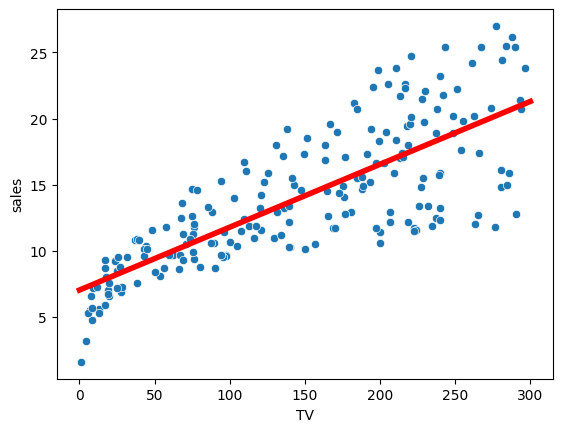

In [74]:
sns.scatterplot(data=df , x="TV" ,  y = "sales" )
plt.plot(harcamalar ,satis , color="r" , lw=4)

# 2. DERECE

In [75]:
np.polyfit(x,y,2)

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

ax^2 +bx + c

In [76]:
satis = -6.84693373e-05 * harcamalar**2 +  6.72659270e-02*harcamalar +  6.11412013e+00

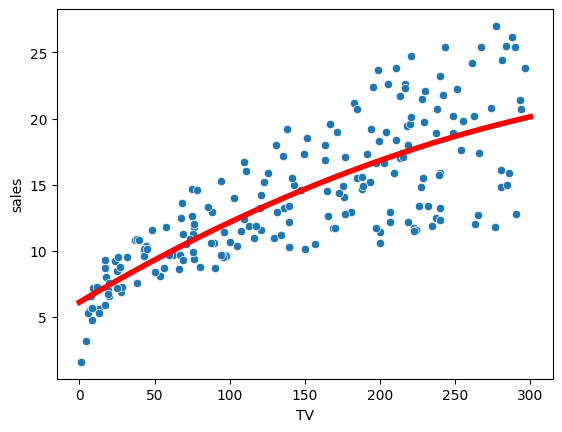

In [77]:
sns.scatterplot(data=df , x="TV" ,  y = "sales" )
plt.plot(harcamalar ,satis , color="r" , lw=4)

## 3. DERECE

In [78]:
np.polyfit(x,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

ax^3 +bx^2 + cx +d

In [79]:
satis = 5.57199796e-07 * harcamalar **3 + -3.15222433e-04*harcamalar**2 + 9.64341770e-02*harcamalar+ 5.42010655e+00

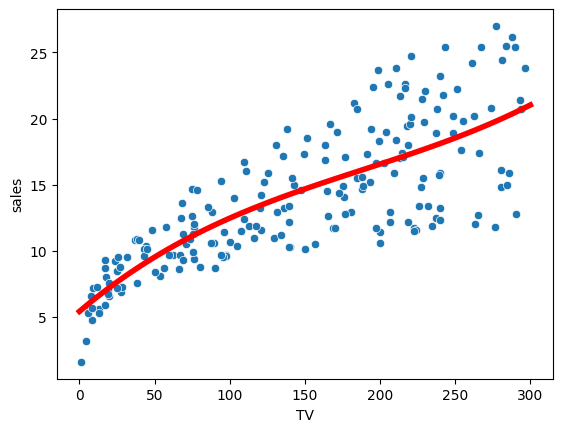

In [80]:
sns.scatterplot(data=df , x="TV" ,  y = "sales" )
plt.plot( harcamalar,satis,color="r" , lw=4)

In [81]:
x= df[["TV","radio", "newspaper"]]
y= df["sales"]

In [82]:
# np.polyfit(x,y,3) 
# Bizden bir vektör istiyor.Artık işe yaramaz

## TRAİN TEST SPLİT

In [83]:
x = df.drop("sales" , axis=1)
y = df["sales"]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=99)

## Linear Model

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model_linear = LinearRegression()

In [88]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [89]:
pred_lin = model_linear.predict(X_test)

## Performans

In [90]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [91]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [92]:
mae = mean_absolute_error(y_test , pred_lin)
rmse = np.sqrt(mean_squared_error(y_test , pred_lin))
r2 = r2_score(y_test , pred_lin)

print("Mae :", mae)
print("Rmse :", rmse)
print("Rr2  :",r2 )

Mae : 1.184391880204893
Rmse : 1.4355426289443451
Rr2  : 0.9197848691418976


In [93]:
res_lin = y_test - pred_lin


<Axes: xlabel='sales', ylabel='sales'>

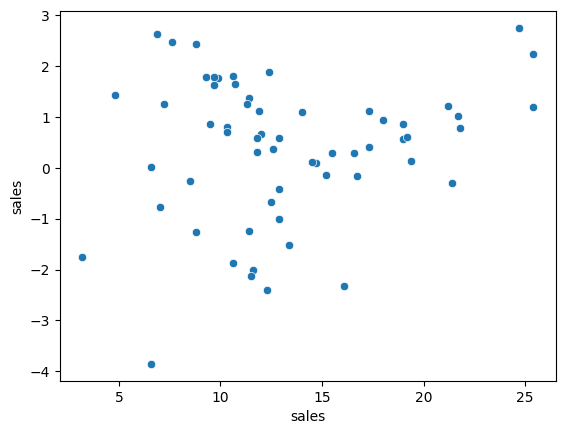

In [94]:
sns.scatterplot(x=y_test , y = res_lin)

<Axes: xlabel='sales', ylabel='Count'>

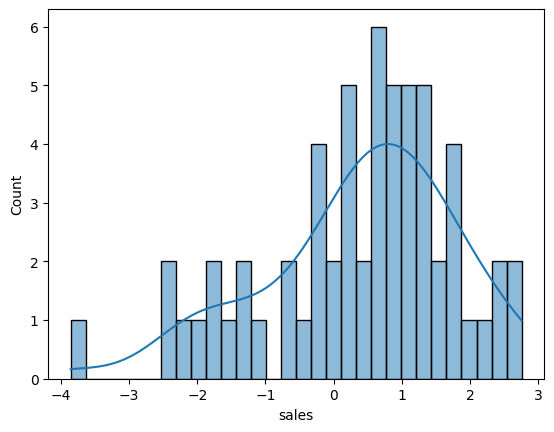

In [95]:
sns.histplot(res_lin,bins=30 , kde=True)

# FİNAL LİN MODEL

In [96]:
final_lin = LinearRegression()

In [97]:
final_lin.fit(x,y)

LinearRegression()

In [98]:
y_hat = final_lin.predict(x)

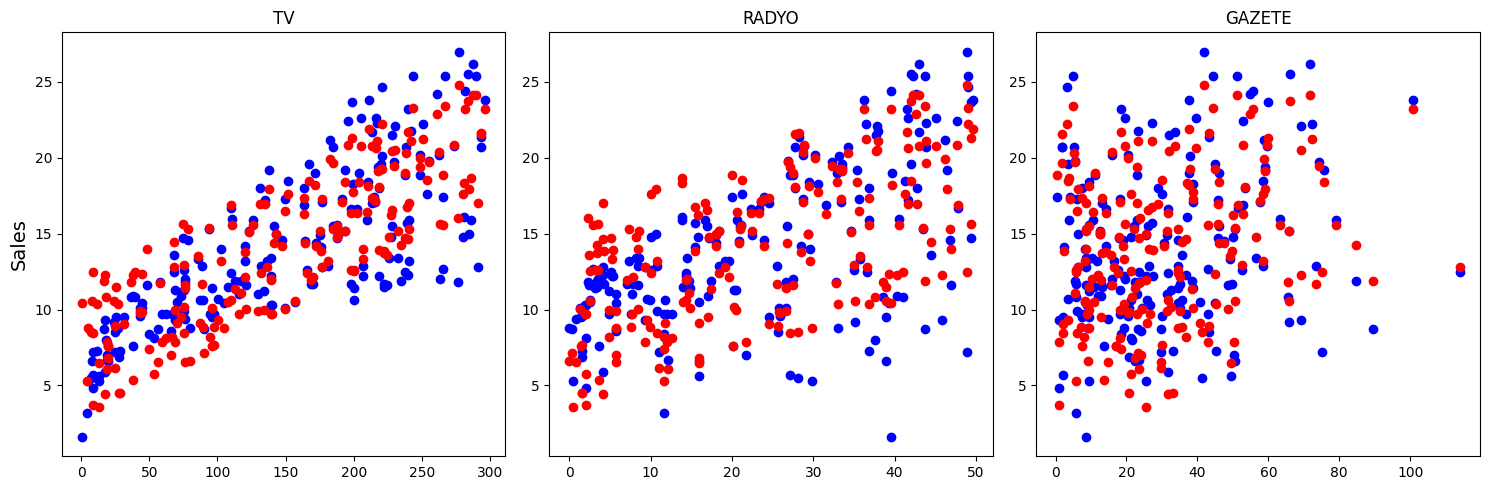

In [99]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="blue")
ax[0].plot(df["TV"], y_hat, "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="blue")
ax[1].plot(df["radio"], y_hat, "o", color="red")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="red")
ax[2].set_title("GAZETE")

plt.tight_layout()

# Mavi gerçek
# Kırmızı bizim çıkardığımız.

# Poly Model

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly_conv = PolynomialFeatures(degree=2 , include_bias=False)

In [102]:
poly_feat = poly_conv.fit_transform(x)

In [103]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [104]:
poly_feat.shape

(200, 9)

In [105]:
# 3 * 4 /2

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_feat, y, test_size=0.3, random_state=99)

In [107]:
model_poly = LinearRegression(fit_intercept=True)

In [108]:
model_poly.fit(X_train , y_train)

LinearRegression()

In [109]:
pred_polinom = model_poly.predict(X_test)

In [110]:
mae = mean_absolute_error(y_test , pred_polinom)
rmse = np.sqrt(mean_squared_error(y_test , pred_polinom))
r2= r2_score(y_test, pred_polinom)

In [111]:
print("Mae  : ", mae)
print("Rmse : ", rmse)
print("R2   : ",r2)


Mae  :  0.4678054953837947
Rmse :  0.6106500340084698
R2   :  0.9854852727114002


# EN İYİ REGRESYON DERECESİ

In [ ]:
# RMSE (Root Mean Squared Error) değerlerini saklamak için boş listeler oluşturuyoruz
train_rmse = []
test_rmse = []

# Polinom derecesini 1'den 9'a kadar değiştirerek test ediyoruz
for d in range(1, 10):
    
    # Belirtilen dereceye sahip polinom özelliklerini oluştur
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(x)  # x verisini polinom özelliklerine dönüştür
    
    # Veriyi eğitim ve test setlerine ayır (test seti %30, eğitim seti %70)
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    # Lineer Regresyon modelini oluştur ve eğit
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    # Modelin eğitim ve test setleri üzerinde tahmin yapmasını sağla
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Eğitim ve test setleri için RMSE hesapla
    train_RMSE = np.sqrt(mean_squared_error(y_test, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

    # Hesaplanan RMSE değerlerini listelere ekle
    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

# train_rmse ve test_rmse listeleri, farklı polinom dereceleri için hata değerlerini içerir


NameError: name 'PolynomialFeatures' is not defined

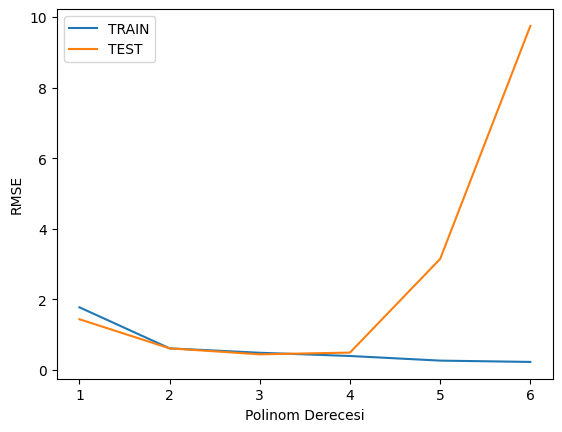

In [113]:
plt.plot(range(1,7),train_rmse[:6],label='TRAIN')
plt.plot(range(1,7),test_rmse[:6],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

İdeal polinom derecesi grafikteki değerin uçtuğu yer yani 4 dür

# Değer ekleyelm

    

In [ ]:
# Önce polinom dönüşümünü uygula
deger_poly = poly_conv.transform(np.array([44.5, 39.3, 45.1 ]).reshape(1, -1))

# Sonra modeli kullanarak tahmin yap
tahmin = model.predict(deger_poly)
print(tahmin)


#Önemli: poly_conv değişkeni, modeli eğitirken kullandığın
#  PolynomialFeatures nesnesi olmalı
#  Eğer bu nesneyi kod içinde kaybettiysen
#  modeli eğitirken kullandığın PolynomialFeatures objesini tekrar tanımlaman gerekebilir.


#reshape(1, -1) kullanımının sebebi, scikit-learn kütüphanesinin giriş verisini 2D (matris) formatında beklemesi.





[10.42694151]


C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# GÖRSELLEŞTİRME

In [115]:
df.head(5
        )

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [116]:
poly_reg = PolynomialFeatures(degree=4)
x_Poly = poly_reg.fit_transform(x)
poly_reg.fit(x_Poly,y)
poly_reg_final = LinearRegression()
poly_reg_final.fit(x_Poly , y)

LinearRegression()

In [117]:
poly_reg_pred = poly_reg_final.predict(x_Poly)

In [118]:
mae = mean_absolute_error(y , poly_reg_pred)
rmse = np.sqrt(mean_squared_error(y , poly_reg_pred))
r2= r2_score(y, poly_reg_pred)
print("Mae  : ", mae)
print("Rmse : ", rmse)
print("R2   : ",r2)


Mae  :  0.2740419402490999
Rmse :  0.37778612706133585
R2   :  0.9947307203701946


In [119]:
df["sales"].mean(), df["sales"].std()

(np.float64(14.0225), np.float64(5.217456565710478))

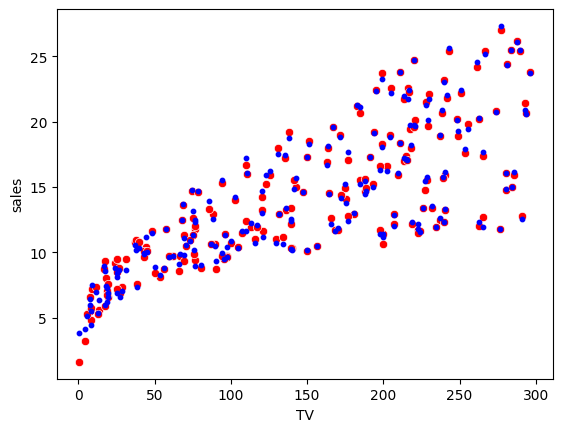

In [120]:
sns.scatterplot(x=x["TV"] ,y= y , color ="red" , data=df)
plt.scatter(x["TV"] , poly_reg_pred , color="blue",s=10)

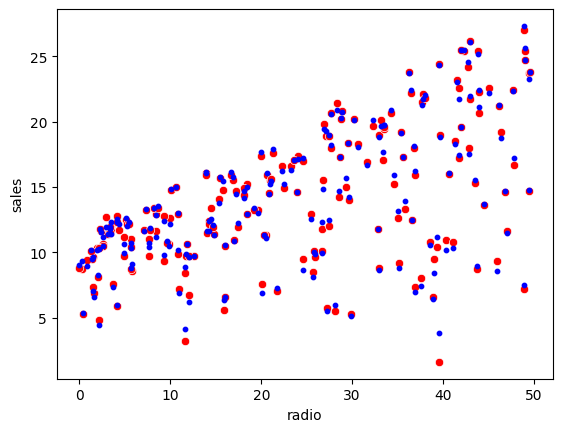

In [121]:
sns.scatterplot(x=x["radio"] ,y= y , color ="red" , data=df)
plt.scatter(x["radio"] , poly_reg_pred , color="blue",s=10)

# REGRESYON EĞRİSİ

In [122]:
X = df[["TV"]] # iki köşeli parntez olmadan da çalıştır
y = df["sales"]

In [123]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_3 = LinearRegression()
poly_regr_3.fit(X_poly, y)

LinearRegression()

In [124]:
poly_pred_3 = poly_regr_3.predict(X_poly)

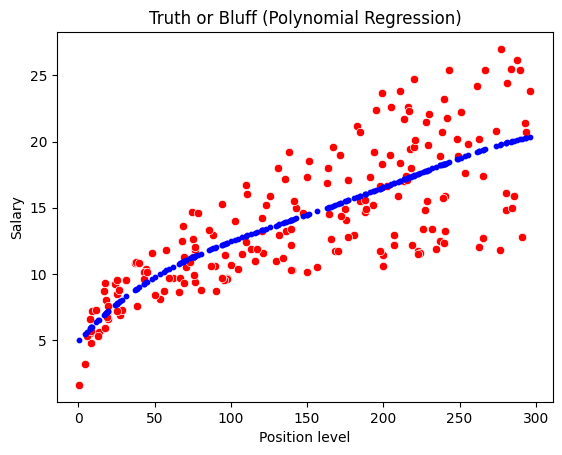

In [125]:
sns.scatterplot(x=X["TV"], y=y, color = 'red',data=df) # ["TV"] olmadan çalıştır
plt.scatter(X ,poly_pred_3, color = 'blue', s=10)
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# include_bias = True

Polinom hale gelmiş veri setine tamamı birlerden oluşan bir sütün ekler

include_bias=True, genellikle bağımsız değişkenler kümesinde sabit terimi içermeyen durumlarda kullanılır.

Eğer include_bias=False olarak ayarlanırsa, sabit terim (bias) eklenmez ve modelin orijinden geçmesi sağlanır.